In [1]:
#Representation of data (Figure 1)
import pandas as pd
import numpy as np
import os
os.chdir("/Users/soumenbera/Documents/killing_Tcells")
data = pd.read_excel('Data_killing_23July2018-curated-final.xlsx') #data path
control_data = pd.read_excel('control-data.xlsx')
df = pd.DataFrame(data,columns = ['Time','Background','Tcells','Parasite ID','Intensity'])
#df["Intensity_scale"] = np.log10(df.Intensity)
#df["Intensity_scale1"] = df.Intensity_scale.fillna(df.Intensity_scale.mean())
df["Time_1"] = df.Time/60.0
df["Intensity_scale"] = df.Intensity.fillna(df.Intensity.mean())
df["Background_scale"] = df.Background.fillna(df.Background.mean())
df["VI_Index"] = np.log10(df["Intensity_scale"]/df["Background_scale"])
#df.loc[(df.Intensity_scale1>np.mean(df.Intensity_scale1))|((df.Intensity_scale1<=np.mean(df.Intensity_scale1)))]
from sklearn import preprocessing
#df["time_scaled"] = preprocessing.scale(df.Time.values)
#print (df)
#print (df['Time from T transfer (min)'], df['Parasite ID']==1)
#df["Intensity_scale2"]=df.Intensity_scale>np.mean(df.Intensity_scale1)
print(df)
import sys
print(sys.path)

          Time  Background  Tcells  Parasite ID  Intensity     Time_1  \
0     240.0000        51.2       5            1      170.8   4.000000   
1     241.1589        54.0       5            1      198.3   4.019315   
2     242.3178        53.9       5            1      192.4   4.038630   
3     243.4767        51.9       5            1      192.5   4.057945   
4     244.6356        54.3       5            1      193.7   4.077260   
...        ...         ...     ...          ...        ...        ...   
2114  639.8325        69.7       0           32      151.3  10.663875   
2115  645.2825        70.6       0           32      154.9  10.754708   
2116  650.7325        68.4       0           32      145.0  10.845542   
2117  656.1825        67.7       0           32      154.7  10.936375   
2118  661.6325        70.5       0           32      152.3  11.027208   

      Intensity_scale  Background_scale  VI_Index  
0               170.8              51.2  0.523218  
1               198

In [2]:
import matplotlib.pyplot as plt
j = 1
df2=[]
for i in range(32):
    df1=(df[df['Parasite ID']==j]) # separate the data according to parasite id 
    df2.append(df1)
    j=j+1

In [4]:
import os
#import sys
#import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import gridspec
%matplotlib inline
%precision 4
#plt.style.use('ggplot')
plt.style.use('seaborn-bright')

No handles with labels found to put in legend.


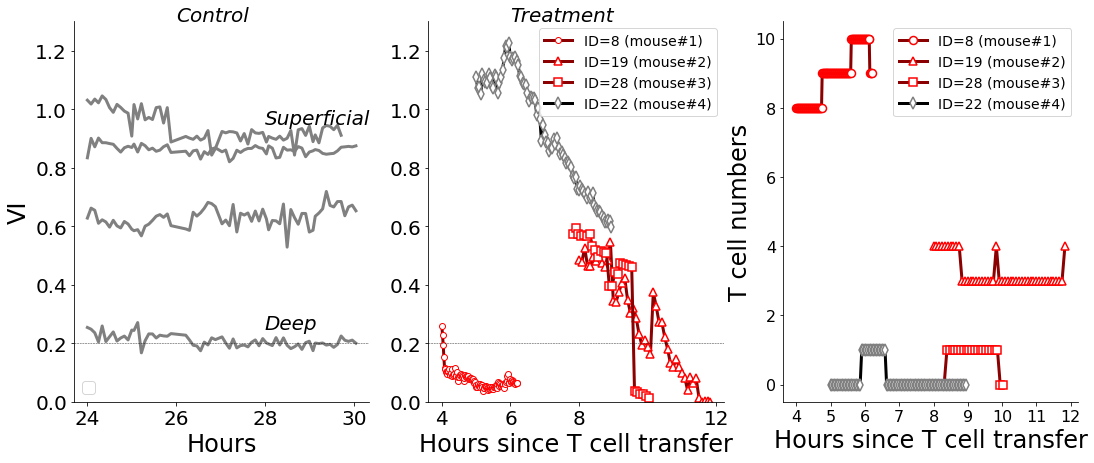

In [5]:
import string
fig = plt.figure(figsize=(18,7))
gs = gridspec.GridSpec(1, 3) 
ax0 = plt.subplot(gs[0])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax1 = plt.subplot(gs[1])
ax2 = plt.subplot(gs[2])
ax1.plot(df2[7]['Time_1'],df2[7]['VI_Index'],'-o', color='darkred',
         linewidth=3,markerfacecolor='white',
         markeredgecolor='red',
         label="ID=8 (mouse#1)")

ax1.plot(df2[18]['Time_1'],df2[18]['VI_Index'],'-^', color='darkred',
         linewidth=3,markerfacecolor='white',
         markeredgecolor='red',markersize=8,markeredgewidth=1.5,
         label="ID=19 (mouse#2)")
ax1.plot(df2[27]['Time_1'],df2[27]['VI_Index'],'-s', color='darkred',
         linewidth=3,markerfacecolor='white',
         markeredgecolor='red',markersize=8,markeredgewidth=1.5,
         label="ID=28 (mouse#3)")
ax1.plot(df2[21]['Time_1'],df2[21]['VI_Index'],'-d', color='black',
         linewidth=3,markerfacecolor='white',markersize=8,markeredgewidth=1.5,
         markeredgecolor='gray',
         label="ID=22 (mouse#4)")
ax1.set_ylim(0,1.3)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.yaxis.set_ticks_position('left')
ax1.xaxis.set_ticks_position('bottom')
ax1.legend(loc='lower left', prop={'size': 16})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax0.plot(control_data['Time'],control_data['P2'],'-', color='gray',
         linewidth=3,
         label="")
ax0.plot(control_data['Time'],control_data['P3a'],'-', color='gray',
         linewidth=3,
         label="")
ax0.plot(control_data['Time'],control_data['P9'],'-', color='gray',
         linewidth=3,
         label="")
ax0.plot(control_data['Time'],control_data['P8'],'-', color='gray',
         linewidth=3,
         label="")
#ax0.axhline(y=0.1, color='k', linestyle='--', alpha=1, linewidth=0.5)

ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.yaxis.set_ticks_position('left')
ax0.xaxis.set_ticks_position('bottom')
ax0.legend(loc='lower left', prop={'size': 16})

ax1.set_xlabel('Hours since T cell transfer', fontsize=24)
ax0.set_ylabel('VI', fontsize=24)
ax0.set_xlabel('Hours', fontsize=24)
ax0.set_ylim(0,1.3)
ax0.axhline(y=0.2, color='k', linestyle='--', alpha=0.8, linewidth=0.5)
ax1.axhline(y=0.2, color='k', linestyle='--', alpha=0.8, linewidth=0.5)

ax0.set_xticks([24,26,28,30])
ax1.set_xticks([4,6,8,12])
#ax0.axvspan(4,12, alpha=0.10, color='green', lw=0)
#ax0.axvspan(24,30, alpha=0.10, color='gray', lw=0)

ax1.text(6,1.3,'Treatment',style='italic',fontsize=20)
ax0.text(26,1.3,'Control',style='italic',fontsize=20)
ax0.text(28,0.95,'Superficial',style='italic',fontsize=20)
ax0.text(28,0.25,'Deep',style='italic',fontsize=20)
#ax0.text(-0.1, 1.1, string.ascii_uppercase[0], transform=ax0.transAxes, 
#            size=28, weight='bold')

ax2.plot(df2[7]['Time_1'],df2[7]['Tcells'],'-o', color='darkred',
         linewidth=3,markerfacecolor='white',markersize=8,markeredgewidth=1.5,
         markeredgecolor='red',
         label="ID=8 (mouse#1)")
ax2.plot(df2[18]['Time_1'],df2[18]['Tcells'],'-^', color='darkred',
         linewidth=3,markerfacecolor='white',markersize=8,markeredgewidth=1.5,
         markeredgecolor='red',
         label="ID=19 (mouse#2)")
ax2.plot(df2[27]['Time_1'],df2[27]['Tcells'],'-s', color='darkred',
         linewidth=3,markerfacecolor='white',markersize=8,markeredgewidth=1.5,
         markeredgecolor='red',
         label="ID=28 (mouse#3)")
ax2.plot(df2[21]['Time_1'],df2[21]['Tcells'],'-d', color='black',
         linewidth=3,markerfacecolor='white',markersize=8,markeredgewidth=1.5,
         markeredgecolor='gray',
         label="ID=22 (mouse#4)")

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')

ax2.set_xlabel('Hours since T cell transfer', fontsize=24)
ax2.set_ylabel('T cell numbers', fontsize=24)

ax2.legend(loc='upper right', prop={'size': 14})
ax1.legend(loc='upper right', prop={'size': 14})
ax1.tick_params(axis='both',which = 'major',labelsize = 20)
ax1.tick_params(axis='both',which = 'minor',labelsize = 20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()
fig.tight_layout()
fig.savefig('/Users/soumenbera/Documents/Killing_Tcells/Figure-data-1-b.png', format='png', dpi=600)

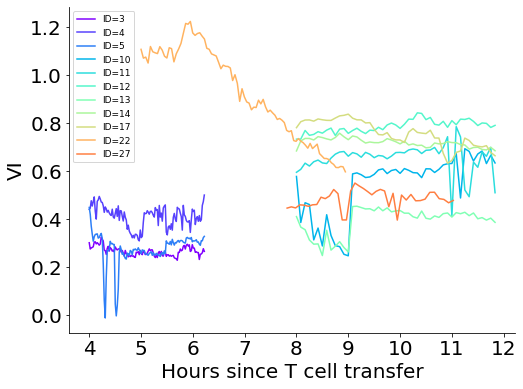

In [10]:
import string
from matplotlib.pyplot import cm

color=cm.rainbow(np.linspace(0,1,13))
fig = plt.figure(figsize=(8,6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.yaxis.set_ticks_position('left')
ax0.xaxis.set_ticks_position('bottom')
for i,c in zip([2,3,4,9,10,11,12,13,16,21,26],color):
    ax0.plot(df2[i]['Time_1'],df2[i]['VI_Index'],c=c,label='ID=%i'%(i+1))
    ax0.legend(loc='upper left', prop={'size': 9})
ax0.set_ylabel('VI', fontsize=20)
ax0.set_xlabel('Hours since T cell transfer', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()
fig.savefig('/Users/soumenbera/Documents/Killing_Tcells/Supplymentary-1-b.png', format='png', dpi=600)